In [148]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from datasets.utils import load
import default_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Plot place cell activity at each angle

In [201]:
dataset_torch, labels, train_loader, test_loader = load(default_config)
thetas = np.array(labels["angles"])
sort = np.argsort(thetas)
sorted_thetas = thetas[sort]
dataset = dataset_torch.detach().numpy()
sorted_dataset = dataset[sort,:]

INFO: # - Found file at data/expt34_times_timestep1000000.txt! Loading...
INFO: # - Found file at data/expt34_place_cells_timestep1000000.npy! Loading...
INFO: # - Found file at data/expt34_labels_timestep1000000.txt! Loading...


      Unnamed: 0         times      angles  velocities  gains
0              0  3.625397e+08  125.815085   -0.104195    1.0
1              1  3.635397e+08  129.515412   13.455259    1.0
2              2  3.645397e+08  154.552048   30.988614    1.0
3              3  3.655397e+08  184.048601   27.353089    1.0
4              4  3.665397e+08  212.071814   28.240268    1.0
...          ...           ...         ...         ...    ...
2948        2948  3.310540e+09   37.660339    0.094720    1.0
2949        2949  3.311540e+09   38.190007    1.087265    1.0
2950        2950  3.312540e+09   38.595808   -1.100449    1.0
2951        2951  3.313540e+09   46.685671   16.660279    1.0
2952        2952  3.314540e+09   54.966355    1.060331    1.0

[2953 rows x 5 columns]
Dataset shape: (934, 40).


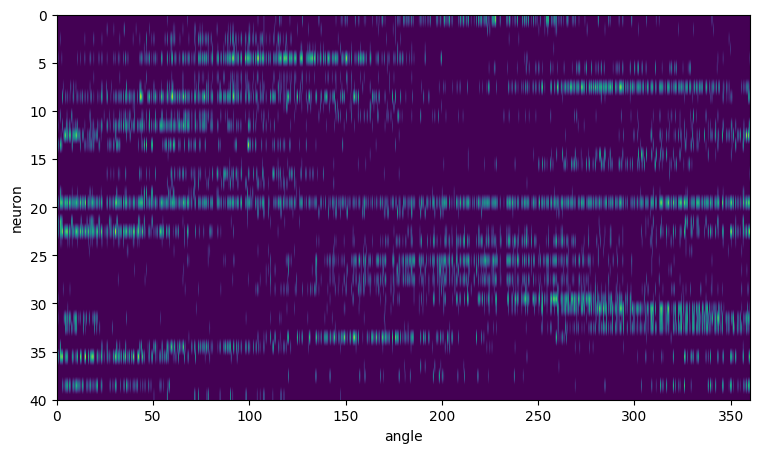

In [202]:
plt.figure(figsize=(20,5))
plt.xlabel("angle")
plt.ylabel("neuron")

plt.imshow(sorted_dataset.T,extent = [0,360,40,0],aspect = 5)

### Fit Gaussian tuning curve to each neuron activity

In [203]:
from scipy.optimize import curve_fit


def exp(x, mu, sigma):
    return (1/(sigma*np.sqrt(2*np.pi)))*np.exp(-((x-mu)**2)/(2*sigma**2))



places = np.zeros(sorted_dataset.shape[1])

for _ in range(sorted_dataset.shape[1]):
    places[_] = curve_fit(exp,sorted_thetas,sorted_dataset[:,_])[0][0]

In [198]:
place_sort = np.argsort(places)

In [199]:
f = sorted_dataset[:,place_sort]